In [1]:
#import all the functions in the util_function folder
import sys
sys.path.append('./util_function/')  # Make sure this path is correct relative to your current working directory.
from function_data_preprocessing import *
from function_model import *



In [2]:
# import all the necessary libraries
import numpy as np
import scipy.io
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Convert Time to Datetime
def convert_to_time(hmm):
    year, month, day, hour, minute, second = int(hmm[0]), int(hmm[1]), int(hmm[2]), int(hmm[3]), int(hmm[4]), int(hmm[5])
    return datetime(year=year, month=month, day=day, hour=hour, minute=minute, second=second)


# Load .mat file
def loadMat(matfile):
    data = scipy.io.loadmat(matfile)
    filename = matfile.split('/')[-1].split('.')[0]
    col = data[filename]
    col = col[0][0][0][0]
    size = col.shape[0]

    data = []
    for i in range(size):
        k = list(col[i][3][0].dtype.fields.keys())
        d1, d2 = {}, {}
        if str(col[i][0][0]) != 'impedance':
            for j in range(len(k)):
                t = col[i][3][0][0][j][0];
                l = [t[m] for m in range(len(t))]
                d2[k[j]] = l
        d1['type'], d1['temp'], d1['time'], d1['data'] = str(col[i][0][0]), int(col[i][1][0]), str(convert_to_time(col[i][2][0])), d2
        data.append(d1)

    return data


# get the cycle and capacity of the battery
def getBatteryCapacity(Battery):
    cycle, capacity = [], []
    i = 1
    for Bat in Battery:
        if Bat['type'] == 'discharge':
            capacity.append(Bat['data']['Capacity'][0])
            cycle.append(i)
            i += 1
    return [cycle, capacity]


# get the battery temperature
def getBatteryValues(Battery, Type='charge'):
    data=[]
    for Bat in Battery:
        if Bat['type'] == Type:
            data.append(Bat['data'])
    return data

In [4]:
Battery_list = ['B0005', 'B0006', 'B0007', 'B0018'] # 4 batteries
dir_path = './NASA_Battery_dataset/'

capacity, charge, discharge = {}, {}, {}
for name in Battery_list:
    print('Load Dataset ' + name + '.mat ...')
    path = dir_path + name + '.mat'
    data = loadMat(path)
    capacity[name] = getBatteryCapacity(data)              # cycle and capacity
    charge[name] = getBatteryValues(data, 'charge')        # charge data
    discharge[name] = getBatteryValues(data, 'discharge')  # discharge data

Load Dataset B0005.mat ...
Load Dataset B0006.mat ...
Load Dataset B0007.mat ...
Load Dataset B0018.mat ...


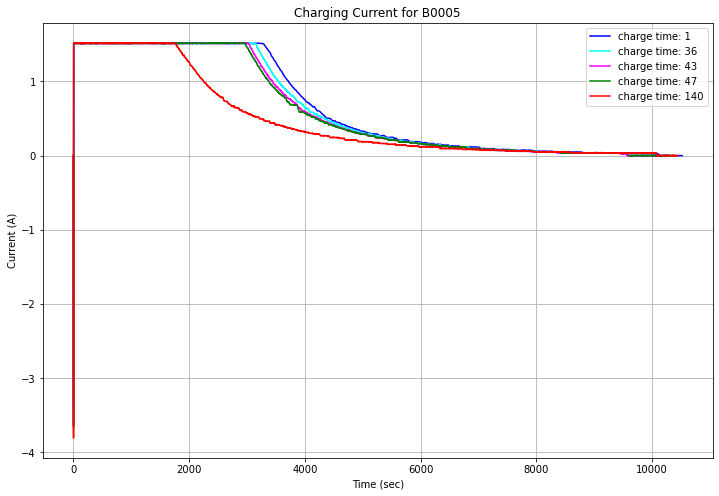

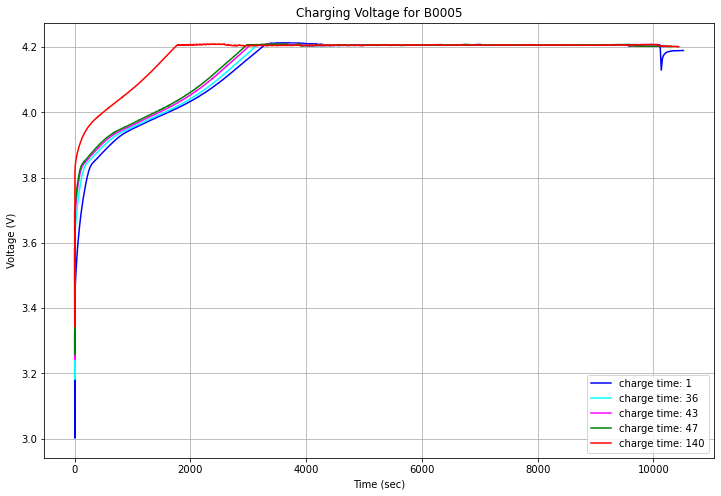

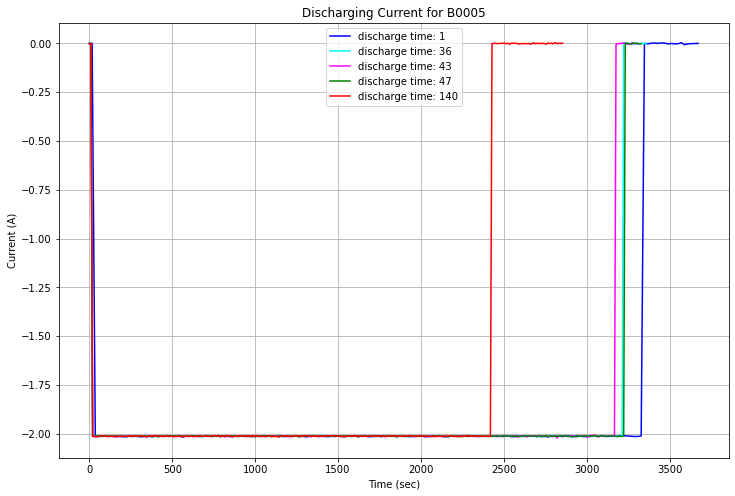

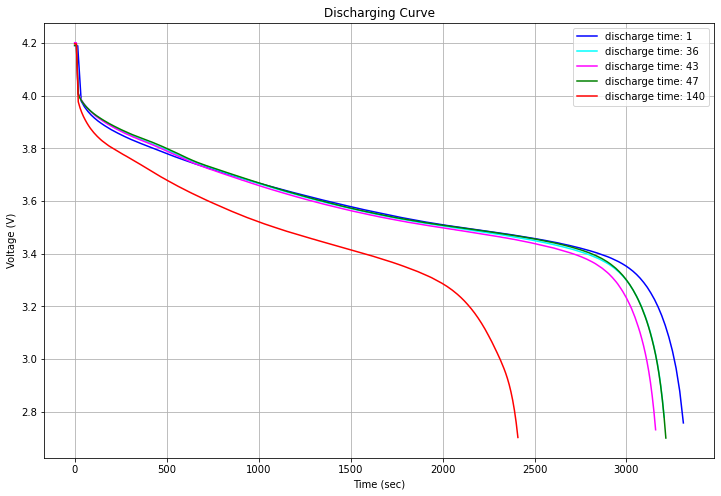

In [5]:
import matplotlib.pyplot as plt

# Define the battery and time points we want to plot
name = 'B0005'
time_points = [1, 36,43,47, 140]
charge_colors = ['blue','cyan', 'magenta','green', 'red']
discharge_colors =['blue', 'cyan','magenta','green', 'red'] #['cyan', 'magenta', 'yellow']

# Plot for charging current
fig, ax = plt.subplots(figsize=(12, 8))
for i, t in enumerate(time_points):
    Battery = charge[name][t]
    ax.plot(Battery['Time'], Battery['Current_measured'], charge_colors[i], label=f'charge time: {t}')
ax.set(xlabel='Time (sec)', ylabel='Current (A)', title=f'Charging Current for {name}')
ax.legend()
ax.grid(True)
plt.savefig(f'./graph_datapreprocessing/{name}_charging_current.png', bbox_inches='tight')
plt.show()

# Plot for charging voltage
fig, ax = plt.subplots(figsize=(12, 8))
for i, t in enumerate(time_points):
    Battery = charge[name][t]
    ax.plot(Battery['Time'], Battery['Voltage_measured'], charge_colors[i], label=f'charge time: {t}')
ax.set(xlabel='Time (sec)', ylabel='Voltage (V)', title=f'Charging Voltage for {name}')
ax.legend()
ax.grid(True)
plt.savefig(f'./graph_datapreprocessing/{name}_charging_voltage.png', bbox_inches='tight')
plt.show()

# Plot for discharging current
fig, ax = plt.subplots(figsize=(12, 8))
for i, t in enumerate(time_points):
    Battery = discharge[name][t]
    ax.plot(Battery['Time'], Battery['Current_measured'], discharge_colors[i], label=f'discharge time: {t}')
ax.set(xlabel='Time (sec)', ylabel='Current (A)', title=f'Discharging Current for {name}')
ax.legend()
ax.grid(True)
plt.savefig(f'./graph_datapreprocessing/{name}_discharging_current.png', bbox_inches='tight')
plt.show()

# Plot for discharging voltage
fig, ax = plt.subplots(figsize=(12, 8))
for i, t in enumerate(time_points):
    # Extract the discharging data for the given time point
    Battery = discharge[name][t]
    
    # Ensure the Voltage_measured is a numpy array to perform vectorized comparison
    Voltage_measured = np.array(Battery['Voltage_measured'])

    # Find the index where the voltage drops below 2.7V for the first time
    # This will give us an array of booleans where True indicates a voltage < 2.7V
    below_threshold = Voltage_measured < 2.7

    # Now find the first True value in below_threshold
    idx_cutoff = np.argmax(below_threshold) if any(below_threshold) else len(Voltage_measured)
    
    # Select the data up to the cutoff index
    Time = Battery['Time'][:idx_cutoff]
    Voltage = Voltage_measured[:idx_cutoff]
    
    # Plot the data
    ax.plot(Time, Voltage, color=discharge_colors[i], label=f'discharge time: {t}')

ax.set(xlabel='Time (sec)', ylabel='Voltage (V)', title='Discharging Curve')
ax.legend()
ax.grid(True)
plt.savefig(f'./graph_datapreprocessing/{name}_discharging_voltage_cutoff.png', bbox_inches='tight')
plt.show()


In [6]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming `discharge` is your data dictionary containing discharging information
# name = 'B0005'
# time_points = [1, 70, 140]
# colors = ['blue', 'green', 'red']

# # Plot for discharging voltage
# fig, ax = plt.subplots(figsize=(12, 8))
# for i, t in enumerate(time_points):
#     # Extract the discharging data for the given time point
#     Battery = discharge[name][t]
    
#     # Ensure the Voltage_measured is a numpy array to perform vectorized comparison
#     Voltage_measured = np.array(Battery['Voltage_measured'])

#     # Find the index where the voltage drops below 2.7V for the first time
#     # This will give us an array of booleans where True indicates a voltage < 2.7V
#     below_threshold = Voltage_measured < 2.7

#     # Now find the first True value in below_threshold
#     idx_cutoff = np.argmax(below_threshold) if any(below_threshold) else len(Voltage_measured)
    
#     # Select the data up to the cutoff index
#     Time = Battery['Time'][:idx_cutoff]
#     Voltage = Voltage_measured[:idx_cutoff]
    
#     # Plot the data
#     ax.plot(Time, Voltage, color=colors[i], label=f'discharge time: {t}')

# ax.set(xlabel='Time (sec)', ylabel='Voltage (V)', title='Discharging Voltage for B0005')
# ax.legend()
# ax.grid(True)
# plt.savefig(f'./graph_datapreprocessing/{name}_discharging_voltage_cutoff.png', bbox_inches='tight')
# plt.show()

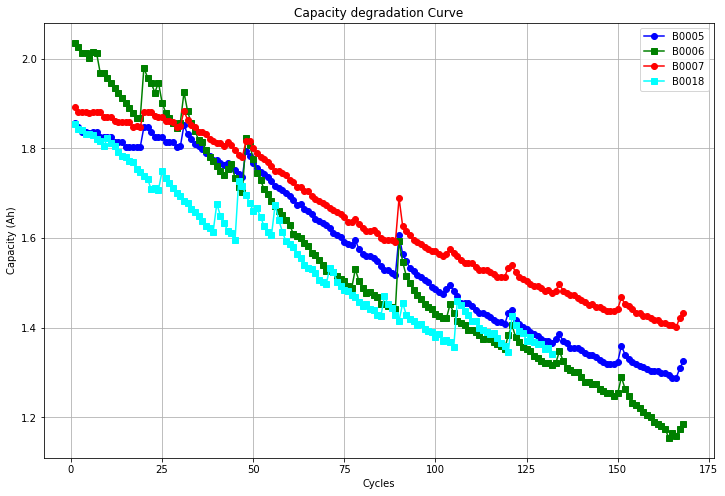

In [7]:
# Plot the capacity degradation curve for each battery
fig, ax = plt.subplots(1, figsize=(12, 8))

# Define styles for each battery type. Each tuple contains (marker, color)
styles = [
    ('o', 'blue'),  # Circle marker, blue color
    ('s', 'green'),  # Triangle marker, green color
    ('o', 'red'),  # Square marker, red color
    ('s', 'cyan')  # Star marker, cyan color
]

# Plot each battery's data with a different style
for (name, (marker, color)) in zip(Battery_list, styles):
    data = capacity[name]
    ax.plot(data[0], data[1], marker=marker, color=color, linestyle='-', label=name)

# Add a horizontal dashed line for the critical point
#plt.axhline(y=2.0*0.7, color='black', linestyle='--', linewidth=1)

# Set the labels and title
# ax.set(xlabel='Cycles', ylabel='Capacity (Ah)', title='Capacity degradation Curve at ambient temperature 24°C')
ax.set(xlabel='Cycles', ylabel='Capacity (Ah)', title='Capacity degradation Curve')
# Show the legend
plt.legend()
plt.grid(True)
plt.savefig('./graph_datapreprocessing/Capacity degradation Curve.png', bbox_inches='tight')
# Display the plot
plt.show()



In [8]:
#import numpy as np

# 'capacity' is a dictionary with battery names as keys and
# each value is a list where the first element is cycle index and the second is the capacity value.

#for name in Battery_list:
 # Extract the list for the battery.
capacity_data = capacity['B0018']

# Extract the capacity values (assuming it's the second element in the list).
capacity_values = capacity_data[1]

# Save the capacity values to a .npy file named after the battery.
np.save('./datasaved/B0018_capacity.npy', capacity_values)



In [9]:
a = np.load('./datasaved/B0018_capacity.npy')
a.shape

(132,)

In [10]:
import pandas as pd
import numpy as np

# Assuming you have a list of battery names
Battery_list = ['B0005', 'B0006', 'B0007']

# Replace with the actual path where your CSV files are stored
base_path = 'NASA_Battery_dataset/'

# Dictionary to hold the capacity data for each battery
capacity_dict = {}

# Loop over each battery in the list
for battery in Battery_list:
    file_path = f'{base_path}{battery}.csv'  # Construct file path
    data = pd.read_csv(file_path)  # Read the data
    capacity_dict[battery] = data['capacity'].values  # Extract the capacity column

# Now let's save each battery's capacity data to a .npy file
for battery in Battery_list:
    np.save(f'./datasaved/{battery}_capacity.npy', capacity_dict[battery])  # Save the capacity data

# The above code saves the capacity data of each battery to a separate .npy file
# in a directory called 'datasaved'. If this directory does not exist, make sure to create it
# before running the code or change the path to an existing directory.



In [11]:
from scipy.io import savemat
import numpy as np
# Define the list of battery identifiers
battery_identifiers = ['B0005', 'B0006', 'B0007', 'B0018']

# Initialize a dictionary to hold the capacity data
capacity_data = {}

# Loop through each identifier and load the corresponding .npy file
for identifier in battery_identifiers:
    # Construct the file name for the smoothed capacity data
    npy_file_name = f'./datasaved/{identifier}_capacity.npy'
    # Load the data from the .npy file
    capacity_data[f'capacity_{identifier}'] = np.load(npy_file_name)

# Now save this dictionary as a .mat file
savemat('./datasaved/capacity_data.mat', capacity_data)

# This will save a .mat file with each variable named as 'capacity_B000x' where 'x' is the identifier


In [12]:
import scipy.io
import numpy as np

# Load the .mat file
mat_data = scipy.io.loadmat('./LowPassFilter_datapreprocessing/LPF_neededdata.mat')


# Prepare dictionary to hold the data for 'B0005', 'B0006', 'B0007', 'B0018'
battery_identifiers = ['B0005', 'B0006', 'B0007', 'B0018']
data_to_save = {}

# Extract the specific vector of data for each identifier and save as .npy
for battery_id in battery_identifiers:
    key = f'FinalModified_LPF_capacity_{battery_id}'
    if key in mat_data:
        # Take the absolute value, reshape to 1D and save to the dictionary
        data_to_save[f'smoothed_{battery_id}_capacity'] = np.abs(mat_data[key]).reshape(-1)

# Save each numpy array from the dictionary to a .npy file
for name, data in data_to_save.items():
    np.save(f'./datasaved/{name}.npy', data)

# Return saved file names
list(data_to_save.keys())


['smoothed_B0005_capacity',
 'smoothed_B0006_capacity',
 'smoothed_B0007_capacity',
 'smoothed_B0018_capacity']